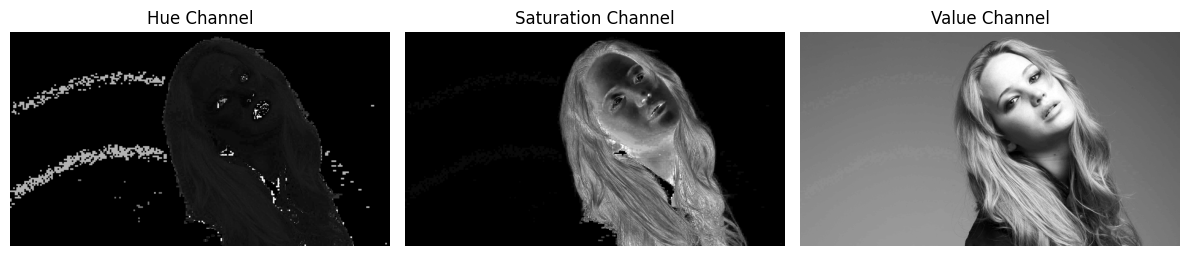

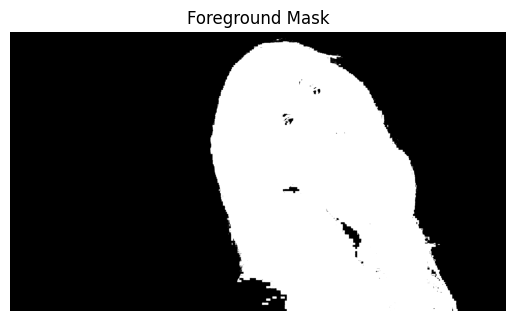

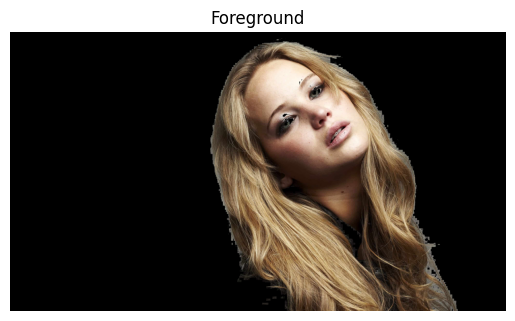

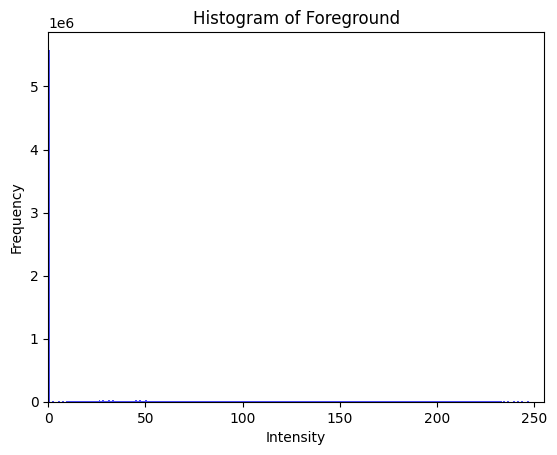

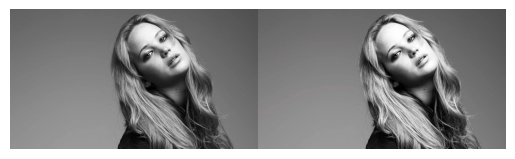

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
image = cv.imread('../Assignment1_Images/jeniffer.jpg')

# Convert the image to the H*S*V* color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value channels
hue_channel, saturation_channel, value_channel = cv.split(hsv_image)

# Display the individual channels in grayscale
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(hue_channel, cmap='gray')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(saturation_channel, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(value_channel, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.savefig('HSV Channels.png')
plt.show()

# Manually set a threshold value (adjust as needed)
manual_threshold = 13

# Choose the value channel for thresholding
threshold_channel = saturation_channel

# Perform thresholding to extract the foreground mask
_, foreground_mask = cv.threshold(threshold_channel, manual_threshold, 255, cv.THRESH_BINARY)

# Display the foreground mask
plt.imshow(foreground_mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')
plt.savefig('Mask_Q6.png')
plt.show()

# Extract the foreground region using cv2.bitwise_and
foreground = cv.bitwise_and(image, image, mask=foreground_mask)

# Display the foreground image
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')
plt.savefig('Foregound_Q6.png')
plt.show()

# Compute the histogram of the foreground region
foreground_gray = cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)
hist, bins = np.histogram(foreground_gray.ravel(), bins=256, range=[0, 255])

# Obtain the cumulative sum of the histogram
cdf = hist.cumsum()

# Plot the histogram using plt.hist
plt.hist(foreground_gray.flatten(), bins=256, range=[0, 255], color='b', alpha=0.7)
plt.title('Histogram of Foreground')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.show()

# Histogram equalization
equalized_foreground_gray = cv.equalizeHist(foreground_gray).astype(np.uint8)

# Convert the equalized foreground back to BGR
equalized_foreground = cv.cvtColor(equalized_foreground_gray, cv.COLOR_GRAY2BGR)

# Extract the background by inverting the foreground mask
background_mask = cv.bitwise_not(foreground_mask)
background = cv.bitwise_and(image, image, mask=background_mask)

# Combine the equalized foreground with the background
result = cv.add(equalized_foreground, background)

img = cv.imread("../Assignment1_Images/jeniffer.jpg", cv.IMREAD_GRAYSCALE)
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
output = np.hstack((img2, result))  # stacking images side-by-side
plt.axis('off')
plt.imshow(output, cmap='gray')

# Save the intensity transformation plot
plt.savefig('Q6_Image_after_foreground_historgram_equalization.png')

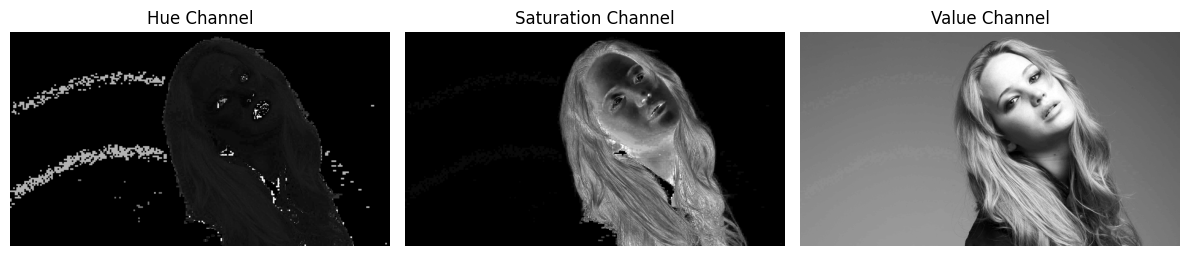

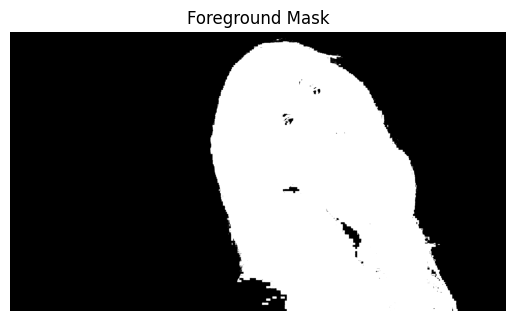

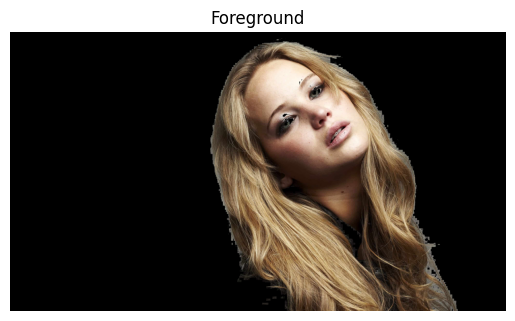

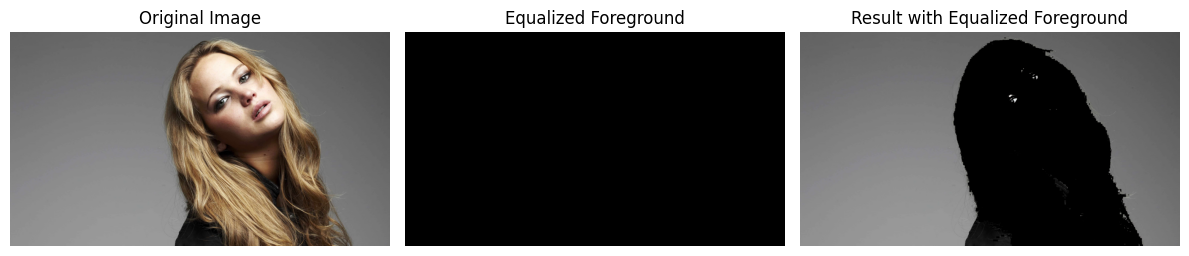

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
image = cv.imread('../Assignment1_Images/jeniffer.jpg')

# Convert the image to the H*S*V* color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value channels
hue_channel, saturation_channel, value_channel = cv.split(hsv_image)

# Display the individual channels in grayscale
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(hue_channel, cmap='gray')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(saturation_channel, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(value_channel, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.savefig('HSV Channels.png')
plt.show()

# Manually set a threshold value (adjust as needed)
manual_threshold = 13

# Choose the value channel for thresholding
threshold_channel = saturation_channel

# Perform thresholding to extract the foreground mask
_, foreground_mask = cv.threshold(threshold_channel, manual_threshold, 255, cv.THRESH_BINARY)

# Display the foreground mask
plt.imshow(foreground_mask, cmap='gray')
plt.title('Foreground Mask')
plt.axis('off')
plt.savefig('Mask_Q6.png')
plt.show()

# Extract the foreground region using cv2.bitwise_and
foreground = cv.bitwise_and(image, image, mask=foreground_mask)

# Display the foreground image
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground')
plt.axis('off')
plt.savefig('Foregound_Q6.png')
plt.show()


# Compute histogram of the foreground
foreground_histogram = cv.calcHist([foreground], [0], None, [256], [0, 256])

# Compute cumulative sum of the histogram
cumulative_histogram = np.cumsum(foreground_histogram)

# Normalize the cumulative histogram
cumulative_histogram_normalized = cumulative_histogram / cumulative_histogram[-1]

# Apply histogram equalization to the foreground
equalized_foreground = np.interp(foreground[:,:,0], np.arange(256), cumulative_histogram_normalized).astype(np.uint8)

# Extract background using the inverse of the binary mask
background_mask = cv.bitwise_not(foreground_mask)
background = cv.bitwise_and(image, image, mask=background_mask)

# Combine the equalized foreground and background
result_image = cv.add(background, cv.cvtColor(equalized_foreground, cv.COLOR_GRAY2BGR))

plt.figure(figsize=(12, 8))

plt.subplot(131)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv.cvtColor(equalized_foreground, cv.COLOR_BGR2RGB))
plt.title('Equalized Foreground')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv.cvtColor(result_image, cv.COLOR_BGR2RGB))
plt.title('Result with Equalized Foreground')
plt.axis('off')

plt.tight_layout()
plt.show()